# Some very basic understanding of DASK arrays and operations with it

In [31]:
from dask.distributed import Client, progress
import dask.array as da
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='8GB')
client

Client Scheduler: inproc://130.116.150.128/37847/14 Dashboard: http://localhost:51302/status,Cluster Workers: 1 Cores: 4 Memory: 8.00 GB


In [2]:
x = da.random.random((4, 4), chunks=(2, 1))
print x.compute()

[[0.9409527  0.05339821 0.04697644 0.91683721]
 [0.25966419 0.01336743 0.60955007 0.57447531]
 [0.4848633  0.97864051 0.5445513  0.51259206]
 [0.343628   0.30427728 0.37127405 0.98481238]]


### Print all elements from the i-th row of the Array

In [3]:
irow = 4
u = x[irow-1:irow,:]
u = u.persist()
print u.compute()

[[0.343628   0.30427728 0.37127405 0.98481238]]


### Print all elements from j-th column of the Array 

In [4]:
icol = 2
v = x[:,icol-1:icol]
v = v.persist()
print v.compute()

[[0.05339821]
 [0.01336743]
 [0.97864051]
 [0.30427728]]


### Print n_row:m_row && i_col:j_col elements from the Array

In [5]:
n_row=2
m_row=4
i_col=1
j_col=4
w = x[n_row:m_row,i_col:j_col]
w = w.persist()
print w.compute()

[[0.97864051 0.5445513  0.51259206]
 [0.30427728 0.37127405 0.98481238]]


### Print the element (i,j) of the Array

In [6]:
i=0
j=3
z = x[i,j]
print z.compute()

0.9168372052390501


### Compute Mean of ALL elements of i-th row: 

In [7]:
i=3
mu = x[i-1:i,:]
print mu.compute()
print "Mean=",mu.mean(axis=1).compute()
print " Sum=",mu.sum(axis=1).compute()
#axis=1 => mean of columns
#axis=0 => mean of rows

[[0.4848633  0.97864051 0.5445513  0.51259206]]
Mean= [0.63016179]
 Sum= [2.52064717]


### Compute Mean of ALL elements of j-th column: 

In [8]:
j=3
mu = x[:,j-1:j]
print mu.compute()
print "Mean=",mu.mean(axis=0).compute()
print " Sum=",mu.sum(axis=0).compute()

[[0.04697644]
 [0.60955007]
 [0.5445513 ]
 [0.37127405]]
Mean= [0.39308796]
 Sum= [1.57235186]


In [9]:
print x.compute()

[[0.9409527  0.05339821 0.04697644 0.91683721]
 [0.25966419 0.01336743 0.60955007 0.57447531]
 [0.4848633  0.97864051 0.5445513  0.51259206]
 [0.343628   0.30427728 0.37127405 0.98481238]]


### Compute Mean/Sum across Rows/Columns:

In [10]:
print "MeanRows=",x.sum(axis=1).compute()
print "MeanCols=",x.sum(axis=0).compute()

MeanRows= [1.95816455 1.45705699 2.52064717 2.00399171]
MeanCols= [2.02910819 1.34968342 1.57235186 2.98871695]


# Let's load a FITS image cube now

In [11]:
from astropy.io import fits as aiof

In [12]:
fitsfile='images/sn1006.bm25.fits'
f=aiof.open(fitsfile,mode='readonly')

In [13]:
print aiof.info(fitsfile)

Filename: images/sn1006.bm25.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      66   (2560, 2560, 1, 288)   float32   
None


### get the header information of the primary extension

In [14]:
#Print entire header for extension 0
#h=aiof.getheader(fitsfile,ext=0)
#print h

### Get relevant information from relevant header (dimensions and sizes of the image) 

In [15]:
import numpy as np
hduNum=0
maxdim=100
naxes = np.zeros(maxdim,dtype='int')
crval = np.zeros(maxdim,dtype='float')
cdelt = np.zeros(maxdim,dtype='float')
crpix = np.zeros(maxdim,dtype='int')
ctype = np.zeros(maxdim,dtype='U8')
cunit = np.zeros(maxdim,dtype='U8')
naxis = aiof.getval(fitsfile,'NAXIS')
for iaxis in range(1,naxis+1):
        # Get the Naxis values:
        string = 'naxis'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        naxes[iaxis] = tmpnum
        
        # Get the coordinate reference value: 
        string = 'crval'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        crval[iaxis] = tmpnum
        
        # Get the coordinate reference pixel: 
        string = 'crpix'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        crpix[iaxis] = tmpnum
        
        # Get the coordinate increment values: 
        string = 'cdelt'+str(iaxis)
        tmpnum = aiof.getval(fitsfile,string,ext=hduNum)
        cdelt[iaxis] = tmpnum
        
        # Get the Ctypes: 
        string = 'ctype'+str(iaxis)
        tmpstr = aiof.getval(fitsfile,string,ext=hduNum)
        ctype[iaxis] = tmpstr
        
        # Get the Units: 
        string = 'cunit'+str(iaxis)
        tmpstr = aiof.getval(fitsfile,string,ext=hduNum)
        cunit[iaxis] = tmpstr
        
simple = aiof.getval(fitsfile,'SIMPLE')
bitpix = aiof.getval(fitsfile,'BITPIX')
restfreq = aiof.getval(fitsfile,'RESTFRQ')
specsys = aiof.getval(fitsfile,'SPECSYS')
bmin = aiof.getval(fitsfile,'BMIN')
bmaj = aiof.getval(fitsfile,'BMAJ')
bpa = aiof.getval(fitsfile,'BPA')
btype = aiof.getval(fitsfile,'BTYPE')
bunit = aiof.getval(fitsfile,'BUNIT')
bzero = aiof.getval(fitsfile,'BZERO')
bscale = aiof.getval(fitsfile,'BSCALE')
timeSys = aiof.getval(fitsfile,'TIMESYS')
origin = aiof.getval(fitsfile,'ORIGIN')
date = aiof.getval(fitsfile,'DATE')




print "Naxis: ",naxis
for iaxis in range(1,naxis+1):
        string1 = 'ctype'+str(iaxis)
        string2 = 'naxis'+str(iaxis)
        print string2,":",ctype[iaxis],";",naxes[iaxis]
        print "(CRpix,CRval,CDelt,Unit) ",crpix[iaxis],",",crval[iaxis],",",cdelt[iaxis],",",cunit[iaxis]
        print " " 

print " Simple:",simple
print " BitPix:",bitpix
print "RESTFRQ:",restfreq
print "SPECSYS:",specsys
print "   BMIN:",bmin
print "   BMAJ:",bmaj
print "    BPA:",bpa
print "  BTYPE:",btype
print "  BUNIT:",bunit
print " BSCALE:",bscale
print "  BZERO:",bzero
print " ORIGIN:",origin
print "TIMESYS:",timeSys
print "   DATE:",date

Naxis:  4
naxis1 : RA---SIN ; 2560
(CRpix,CRval,CDelt,Unit)  1281 , 225.33375 , -0.0008333333333333 , deg
 
naxis2 : DEC--SIN ; 2560
(CRpix,CRval,CDelt,Unit)  1281 , -39.99201944444 , 0.0008333333333333 , deg
 
naxis3 : STOKES ; 1
(CRpix,CRval,CDelt,Unit)  1 , 1.0 , 1.0 , 
 
naxis4 : FREQ ; 288
(CRpix,CRval,CDelt,Unit)  1 , 744990740.783 , 999999.972 , Hz
 
 Simple: True
 BitPix: -32
RESTFRQ: 1420405751.79
SPECSYS: TOPOCENT
   BMIN: 0.00304620788522
   BMAJ: 0.00405257375405
    BPA: 85.7484058568
  BTYPE: Intensity
  BUNIT: Jy/beam
 BSCALE: 1.0
  BZERO: 0.0
 ORIGIN: ASKAPSoft
TIMESYS: UTC
   DATE: 2018-12-14T12:49:38.095000


### Read the relevant Image and convert it to a dask array 

In [16]:
hduNumber=0
Cube=aiof.getdata(fitsfile,ext=hduNumber)

In [17]:
print Cube.shape

(288, 1, 2560, 2560)


In [20]:
import dask.array as da
ichan = 0
dimage = da.from_array(Cube[ichan,0,:,:], chunks=(100, 100))

result = dimage.sum()
print(result)
print(" Sum: ",result.compute())
print("Mean: ",dimage.mean().compute())
print(" Std: ",dimage.std().compute())
print(" Min: ",dimage.min().compute())
print(" Max: ",dimage.max().compute())
#print(" Med: ",dimage.med().compute())

dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=()>
(' Sum: ', 213.12595)
('Mean: ', 3.252044e-05)
(' Std: ', 0.0047792536)
(' Min: ', -0.02858444)
(' Max: ', 2.3868756)


### Plotting

In [22]:
%matplotlib inline
import aplpy
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

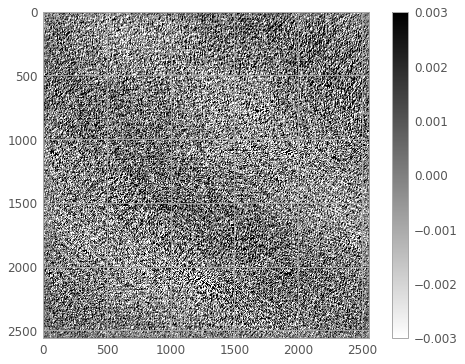

In [23]:
plt.figure()
plt.imshow(dimage, cmap='gray_r',vmin=-0.003,vmax=0.003)
#plt.clim(-0.001,0.005)
plt.colorbar()

# Let us now take up some examples

### A. Compute requires ALL pixels of the plane z=iz
#### 1. Compute the rms of RA-Dec planes for all Frequency Channels
##### We explore two methods here -- One using Dask arrays and the std function of Dask and the other using numpy 
Questions to address: 
* Where does the reading of the data take place? 
* The reading may be done at the lowest level  -- reading data is part of the compute
* The reading of the data may be done up-front, and appropriate part of it is distributed to workers. Will be meaningful when master has sufficient memory. 

In [24]:
import random
import dask
import numpy as np 
import time

# Function to compute the rms of an image: we convert the array in to a Dask array here.
def imrms(inCube,chan,stoke):
    im = da.from_array(inCube[chan,stoke,:,:], chunks=(1000,1000))
    im = im.persist()
    time.sleep(random.random())
    return im.std()

# Function to compute the rms of an image: we use numpy array here.
def imrms_np(inCube,chan,stoke):
    im = inCube[chan,stoke,:,:]
    time.sleep(random.random())
    return np.std(im)

In [26]:
bchan=100
echan=110
maxchan=300
chan_arr = np.arange(bchan,echan)

In [27]:
%%time 
# Use Dask Array Method to compute rms of images:
results = np.zeros(maxchan)
istoke=0
ichan = 0
for chan in chan_arr:
    ichan = ichan + 1 
    result = imrms(Cube,chan,istoke)
    print chan, result.compute()
    
    #results.append(result)
    results[chan] = result
print "nchan: ",echan - bchan + 1
print results[bchan:echan]
print "Method Used: Dask Array"

100 0.0035388703
101 0.003525076
102 0.003512978
103 0.0035219693
104 0.0035290918
105 0.003501904
106 0.0035139371
107 0.0034986823
108 0.0034804705
109 0.0034806074
nchan:  11
[0.00353887 0.00352508 0.00351298 0.00352197 0.00352909 0.0035019
 0.00351394 0.00349868 0.00348047 0.00348061]
Method Used: Dask Array
CPU times: user 9.24 s, sys: 11.5 s, total: 20.7 s
Wall time: 9.19 s


In [28]:
%%time 
# Use Numpy Array Method to compute rms of images:
results = np.zeros(maxchan)
istoke=0
ichan = 0
for chan in chan_arr:
    ichan = ichan + 1 
    result = imrms_np(Cube,chan,istoke)
    print chan, result
    #results.append(result)
    results[chan] = result
print "nchan: ",echan - bchan + 1
print results[bchan:echan]
print "Method Used: Numpy Array"

100 0.0035388696
101 0.0035250753
102 0.0035129774
103 0.0035219698
104 0.0035290923
105 0.0035019035
106 0.003513937
107 0.003498682
108 0.0034804712
109 0.003480608
nchan:  11
[0.00353887 0.00352508 0.00351298 0.00352197 0.00352909 0.0035019
 0.00351394 0.00349868 0.00348047 0.00348061]
Method Used: Numpy Array
CPU times: user 4.06 s, sys: 702 ms, total: 4.77 s
Wall time: 5.7 s


### Implement mpi version of the parallelisation (using the numpy method)